In [68]:
# Store url
url = 'https://www.gutenberg.org/files/98/98-h/98-h.htm'

In [69]:
import requests

In [70]:
r = requests.get(url)
type(r)

requests.models.Response

In [71]:
# Extract HTML from Response object and print
html = r.text
#print(html)

### Part 1: Get the Text from the HTML

In [72]:
from bs4 import BeautifulSoup

In [73]:
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html5lib')
type(soup)

bs4.BeautifulSoup

In [74]:
# get the title
soup.title.string

'\n      A Tale of Two Cities, by Charles Dickens\n    '

In [75]:
# Get the text out of the soup and print it
text = soup.get_text()
#print(text)

### Part 2: Extract Words from Text

##### Step 1: Tokenize

In [76]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

In [77]:
# Create Tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create Tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['ï', 'A', 'Tale', 'of', 'Two', 'Cities', 'by', 'Charles']

In [78]:
# Making lower cases

## Initialize new list
words = []

# Loop through List tokens and make lower cases
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:8]

['ï', 'a', 'tale', 'of', 'two', 'cities', 'by', 'charles']

##### Step 2: Remove stop words

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Faisal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [81]:
# Initialize list for non stop words
words_nsw = []

# Filling up the list
for word in words:
    if word not in sw:
        words_nsw.append(word)

words_nsw[:6]

['ï', 'tale', 'two', 'cities', 'charles', 'dickens']

### 'What are the most frequent words in the novel A Tale of Two Cities and how often do they occur?'

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

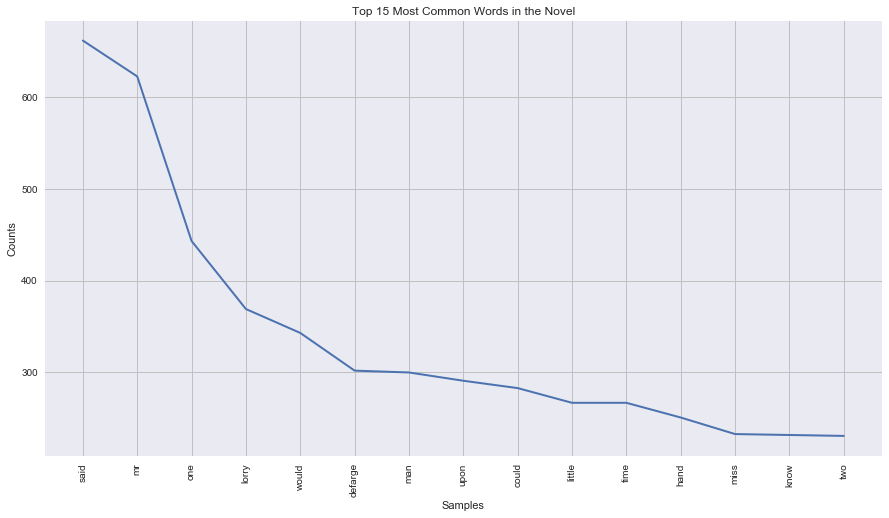

In [104]:
# Plotting Frequecy Distribution
plt.figure(figsize=(15, 8))
freq_dist = nltk.FreqDist(words_nsw)
freq_dist.plot(15, title='Top 15 Most Common Words in the Novel')
